# Predictive Maintenance Model Training

This notebook demonstrates how to train a predictive maintenance model using TensorFlow and save it to Google Drive. Predictive maintenance is a technique to predict equipment failures before they occur, allowing for timely maintenance and reducing downtime.

## Introduction

Predictive maintenance leverages machine learning to analyze historical data from machinery and predict potential failures. This approach helps in optimizing maintenance schedules and reducing unexpected downtimes, which can be costly in industrial settings. In this notebook, I will use a dataset containing sensor data from machinery to build a predictive maintenance model. I will preprocess the data, train a neural network using TensorFlow, and save the trained model to Google Drive.

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [38]:
missing_values = df.isnull().sum()
missing_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [39]:
# Encoded 'Type' and 'Failure Type' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Type', 'Failure Type'], drop_first=True)
df_encoded

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,1,M14860,298.1,308.6,1551,42.8,0,0,False,True,True,False,False,False,False
1,2,L47181,298.2,308.7,1408,46.3,3,0,True,False,True,False,False,False,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,True,False,True,False,False,False,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,True,False,True,False,False,False,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,False,True,True,False,False,False,False
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,False,False,True,False,False,False,False
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,False,True,True,False,False,False,False
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,False,False,True,False,False,False,False


## Preprocess the Data

Preprocessed the data by encoding categorical variables and normalizing numerical features.

In [40]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to be normalized
numerical_columns = ['Air temperature [K]', 'Process temperature [K]',
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
df_encoded

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,1,M14860,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,False,True,True,False,False,False,False
1,2,L47181,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,True,False,True,False,False,False,False
2,3,L47182,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,True,False,True,False,False,False,False
3,4,L47183,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,True,False,True,False,False,False,False
4,5,L47184,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,False,True,True,False,False,False,False
9996,9997,H39410,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,False,False,True,False,False,False,False
9997,9998,M24857,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,False,True,True,False,False,False,False
9998,9999,H39412,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,False,False,True,False,False,False,False


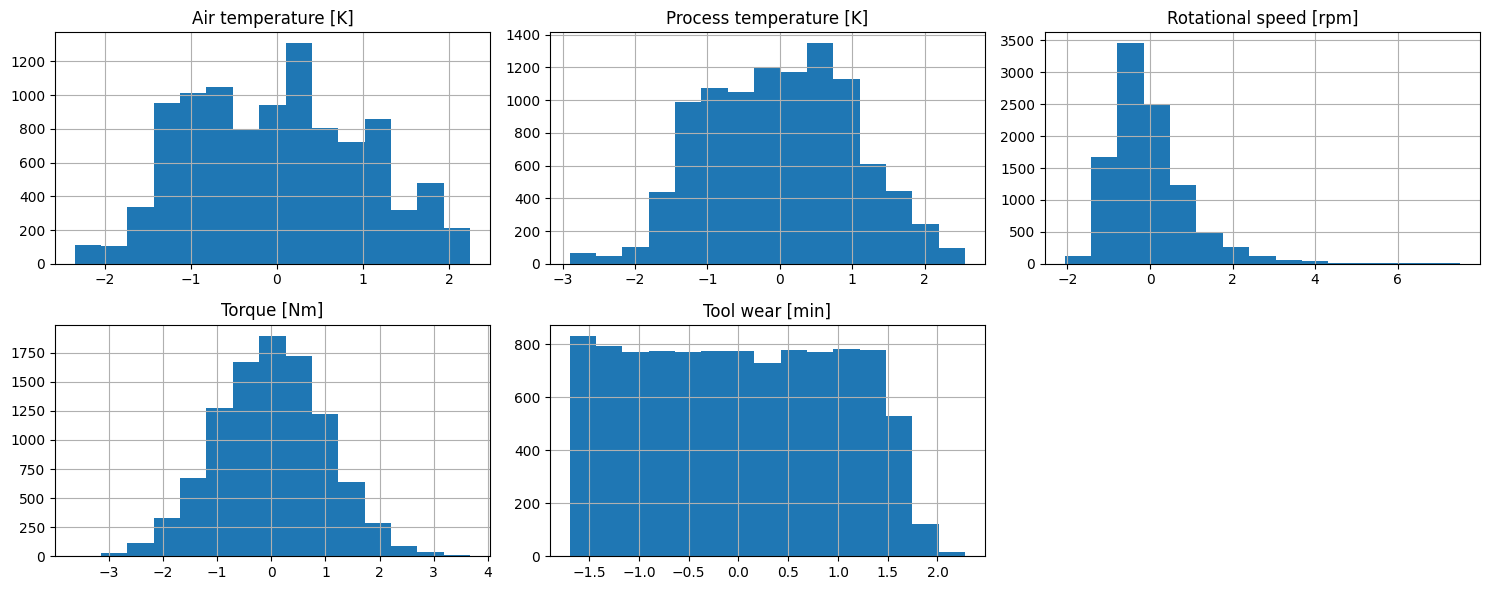

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
df_encoded[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

# Split the Data

Split the data into training and testing sets.

In [42]:
from sklearn.model_selection import train_test_split

# Select relevant features
features = df_encoded.drop(columns=['UDI', 'Product ID', 'Target'])
target = df_encoded['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

# Define and Train the Model

Defined and trained the neutral network model.

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Convert features and target to NumPy arrays with float32 dtype
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2511 - accuracy: 0.9234 - val_loss: 0.1047 - val_accuracy: 0.9588
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9698 - val_loss: 0.0491 - val_accuracy: 0.9806
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9887 - val_loss: 0.0238 - val_accuracy: 0.9956
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9942 - val_loss: 0.0186 - val_accuracy: 0.9981
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9966 - val_loss: 0.0190 - val_accuracy: 0.9981
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9973 - val_loss: 0.0191 - val_accuracy: 0.9981
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0135 - accuracy: 0.9977 - val_loss: 0.0196 - val_accuracy: 0.9981
Epoch 

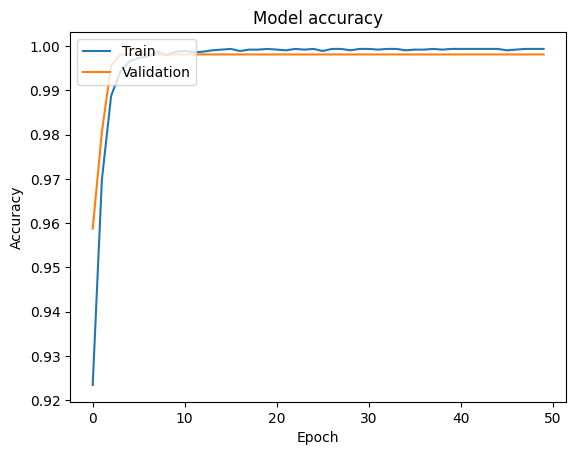

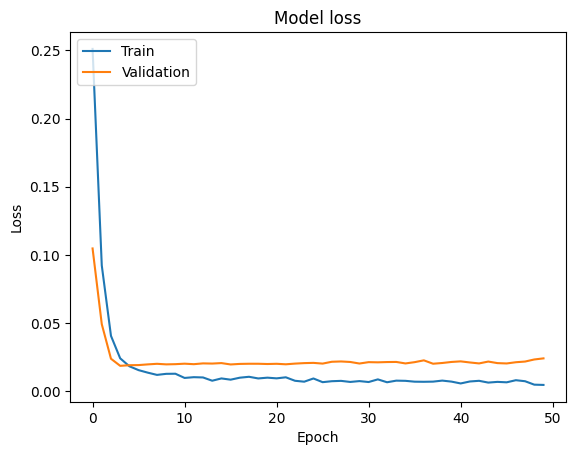

In [44]:
# Plot training & validation values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the Model

Saved the trained model into my Google Drive.

In [46]:
from google.colab import drive

drive.mount('/content/drive')

model.save('/content/drive/MyDrive/predictive_maintenance_model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
